#**Import Library**

In [10]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import math

from IPython.display import Image
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from datetime import timedelta, datetime

%matplotlib inline

In [11]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(dataset)
df.head(15)

# Konversi kolom 'time' ke format datetime
df['time'] = pd.to_datetime(df['time'])

# Seleksi data hanya untuk tahun 1968 - 2018
df_selected = df[(df['time'].dt.year >= 1968) & (df['time'].dt.year <= 2018)]

# Tampilkan lima baris pertama dari data terpilih
df = df_selected
df.head(5)


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1968-01-01 07:50:51.240000+00:00,32.958667,-115.863333,6.0,3.08,ml,5.0,166.0,0.7355,0.29,...,2016-01-28T19:54:48.710Z,"24km WSW of Westmorland, CA",earthquake,1.02,31.61,0.179,5.0,reviewed,ci,ci
1,1968-01-01 11:34:43.790000+00:00,33.468333,-120.179500,6.0,2.59,mh,4.0,302.0,1.0440,0.63,...,2016-01-28T19:37:37.050Z,"53km S of Santa Rosa Is., CA",earthquake,5.56,31.61,0.306,12.0,reviewed,ci,ci
2,1968-01-02 09:50:46.470000+00:00,35.705167,-118.039000,6.0,3.09,ml,8.0,84.0,0.3567,0.71,...,2016-01-28T19:33:22.000Z,"22km WNW of Inyokern, CA",earthquake,1.78,31.61,0.155,11.0,reviewed,ci,ci
3,1968-01-02 11:01:19.830000+00:00,35.740667,-118.060833,6.0,2.88,ml,10.0,97.0,0.3452,0.52,...,2016-01-28T19:59:01.740Z,"25km WNW of Inyokern, CA",earthquake,1.13,31.61,0.167,9.0,reviewed,ci,ci
4,1968-01-04 06:12:39.730000+00:00,35.111000,-119.085833,6.0,2.59,ml,9.0,146.0,0.2834,0.45,...,2016-01-28T19:54:49.210Z,"23km SW of Lamont, CA",earthquake,1.03,31.61,0.136,6.0,reviewed,ci,ci


In [12]:
# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = df[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df_selected_columns.head(10)
df = df_selected_columns

In [13]:
print('Total Jumlah Kejadian Gempa:',df.shape[0])
df.head()

Total Jumlah Kejadian Gempa: 247808


,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,1968-01-01 07:50:51.240000+00:00,32.958667,-115.863333,6.0,3.08,ml,ci,ci3329310,2016-01-28T19:54:48.710Z,earthquake,reviewed,ci,ci
1,1968-01-01 11:34:43.790000+00:00,33.468333,-120.179500,6.0,2.59,mh,ci,ci3342099,2016-01-28T19:37:37.050Z,earthquake,reviewed,ci,ci
2,1968-01-02 09:50:46.470000+00:00,35.705167,-118.039000,6.0,3.09,ml,ci,ci3329312,2016-01-28T19:33:22.000Z,earthquake,reviewed,ci,ci
3,1968-01-02 11:01:19.830000+00:00,35.740667,-118.060833,6.0,2.88,ml,ci,ci3329313,2016-01-28T19:59:01.740Z,earthquake,reviewed,ci,ci
4,1968-01-04 06:12:39.730000+00:00,35.111000,-119.085833,6.0,2.59,ml,ci,ci3329314,2016-01-28T19:54:49.210Z,earthquake,reviewed,ci,ci


In [14]:
# daftar jenis magnitude
df['magType'].value_counts()

mc     105597
mh      56644
ml      56105
md      28893
mw        307
ma        122
mun       118
mb         17
Ml          2
mlr         2
Name: magType, dtype: int64

In [15]:
mag_keep = np.asarray(df['magType'].value_counts().head(6).index)
mag_keep = mag_keep.astype(str)

**Gutenberg–Richter law**

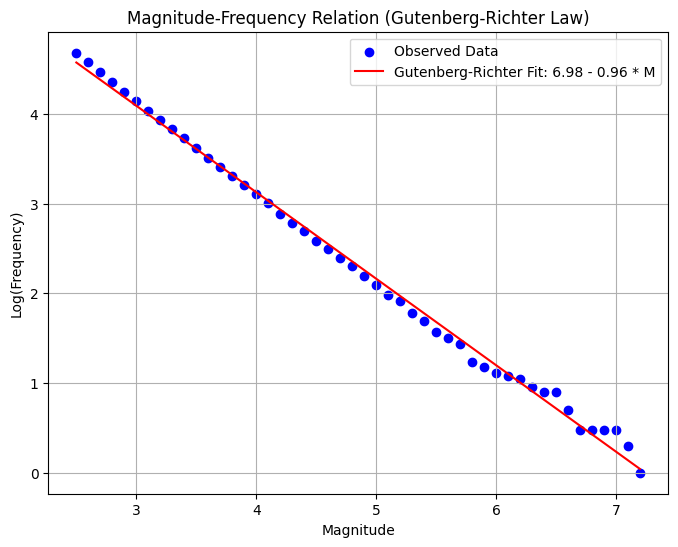

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = df

# Hapus nilai NaN atau infinitas dari kolom 'mag'
data = data.dropna(subset=['mag'])

# Hitung frekuensi kejadian gempa per rentang magnitudo
magnitudes = np.arange(2.5, 8.6, 0.1)  # Rentang magnitudo
frequency = []

for mag in magnitudes:
    count = len(data[data['mag'] >= mag])
    frequency.append(count)

# Hapus nol dari frekuensi untuk menghindari log(0)
frequency = np.array(frequency)
frequency = frequency[frequency != 0]

# Fungsi untuk regresi linear pada skala log-log (Gutenberg-Richter)
def gutenberg_richter(m, a, b):
    return a - b * m

# Perkirakan parameter a dan b untuk garis regresi
popt, pcov = curve_fit(gutenberg_richter, magnitudes[:len(frequency)], np.log10(frequency))

# Plot MFR (Magnitude-Frequency Relation) pada skala log-log dengan garis regresi
plt.figure(figsize=(8, 6))
plt.scatter(magnitudes[:len(frequency)], np.log10(frequency), color='blue', label='Observed Data')
plt.plot(magnitudes[:len(frequency)], gutenberg_richter(magnitudes[:len(frequency)], *popt), color='red', label=f'Gutenberg-Richter Fit: {popt[0]:.2f} - {popt[1]:.2f} * M')
plt.xlabel('Magnitude')
plt.ylabel('Log(Frequency)')
plt.title('Magnitude-Frequency Relation (Gutenberg-Richter Law)')
plt.legend()
plt.grid(True)
plt.show()


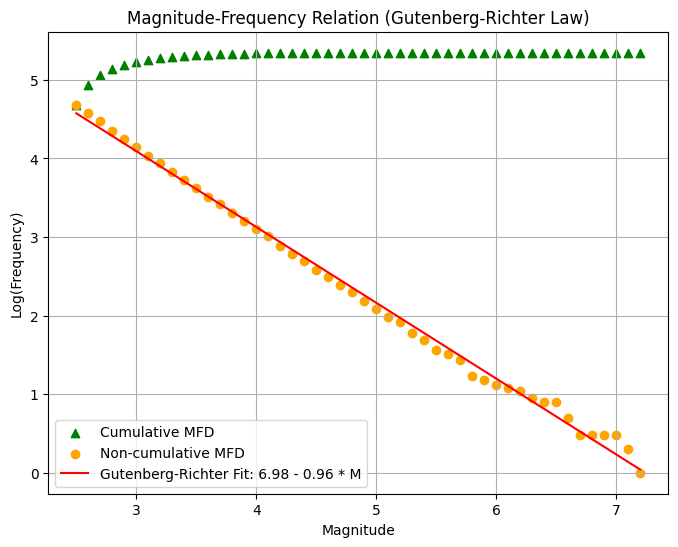

In [18]:
# Simpan nilai MFD kumulatif dan non-kumulatif
cumulative_values = np.cumsum(frequency)
non_cumulative_values = frequency

# Plot MFR (Magnitude-Frequency Relation) pada skala log-log dengan garis regresi
plt.figure(figsize=(8, 6))

# Scatter plot untuk MFD kumulatif (gunakan segitiga)
plt.scatter(magnitudes[:len(cumulative_values)], np.log10(cumulative_values), color='green', marker='^', label='Cumulative MFD')

# Scatter plot untuk MFD non-kumulatif (gunakan lingkaran)
plt.scatter(magnitudes[:len(non_cumulative_values)], np.log10(non_cumulative_values), color='orange', marker='o', label='Non-cumulative MFD')

# Plot garis regresi
plt.plot(magnitudes[:len(frequency)], gutenberg_richter(magnitudes[:len(frequency)], *popt), color='red', label=f'Gutenberg-Richter Fit: {popt[0]:.2f} - {popt[1]:.2f} * M')

plt.xlabel('Magnitude')
plt.ylabel('Log(Frequency)')
plt.title('Magnitude-Frequency Relation (Gutenberg-Richter Law)')
plt.legend()
plt.grid(True)
plt.show()
